In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math, cv2

In [15]:
def get_config(config_path):
    import configparser
    config = configparser.ConfigParser()
    config.read(config_path)
    return config

def show_map(map0, start=None, end=None, path=None):
    plt.imshow(map0, cmap='binary', interpolation='nearest')
    if start is not None:
        plt.scatter(start[0], start[1], c='g', marker='s', label='Start')  # 注意：这里需要交换坐标顺序
    if end is not None:
        plt.scatter(end[0], end[1], c='r', marker='s', label='End')  # 注意：这里需要交换坐标顺序
    if path is not None:
        plt.scatter(path[:, 0], path[:, 1], c='b', marker='o', label='path')
    plt.legend()
    plt.show()

def read_pgm(file_name):
    with open(file_name, 'rb') as f:
        # 读取文件头
        header = f.readline().decode().split()
        width = int(f.readline().decode().split()[0])
        height = int(f.readline().decode().split()[0])
        max_val = int(f.readline().decode().split()[0])
        # print(header, width, height, max_val)
        assert header[0] == 'P2', "Invalid PGM file format"
        # 读取图像数据
        data = [int(x) for x in f.read().split()]
    # 将数据转换成图像
    image = Image.new('L', (width, height))
    image.putdata(data)
    # 显示图像
    mapget = np.array(image)
    return mapget

In [19]:
config = get_config("../data/config.cfg")
start = (int(config['occupancymap_params']['start_x']), int(config['occupancymap_params']['start_y']))
end = (int(config['occupancymap_params']['end_x']), int(config['occupancymap_params']['end_y']))
start, end

((20, 40), (150, 70))

In [21]:
import os
map0 = np.fromfile(os.path.join("../", config['other']['map_data_path']), dtype=np.uint8)
map_x, map_y = int(config['occupancymap_params']['width']), int(config['occupancymap_params']['height'])
map0 = map0.reshape(map_y, map_x)
map0

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

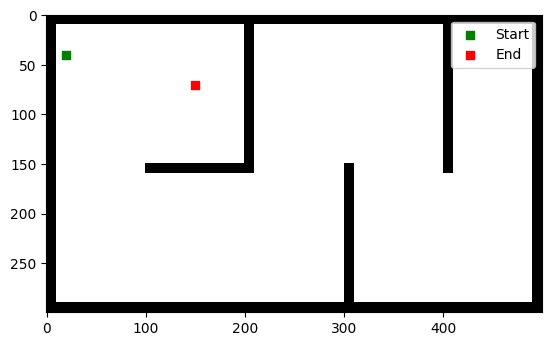

In [22]:
show_map(map0, start=start, end=end)

(75, 2)


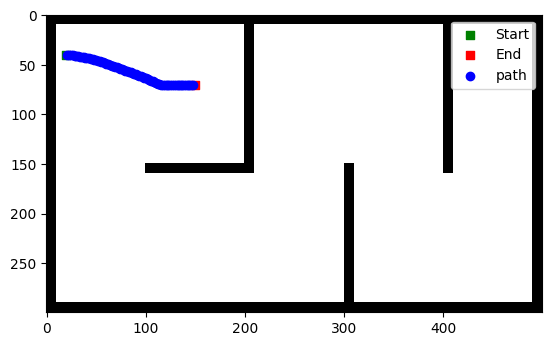

In [24]:
r = 4.2
a = np.fromfile(
    os.path.join(
        "../", 
        f"data/out_path_hybrid_s({start[0]}_{start[1]})_e({end[0]}_{end[1]})_r({r}).bin"
    ), 
    dtype=np.uint32
).reshape(-1, 2)

print(a.shape)
show_map(map0, start=start, end=end, path=a[1:-1])

(131, 2)


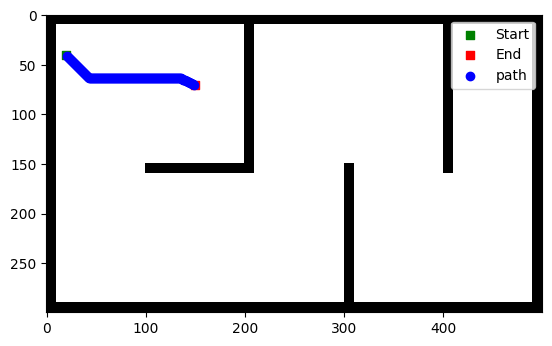

In [25]:
r = 4.2
a = np.fromfile(
    os.path.join(
        "../", 
        f"data/out_path_2d_s({start[0]}_{start[1]})_e({end[0]}_{end[1]})_r({r}).bin"
    ), 
    dtype=np.uint32
).reshape(-1, 2)

print(a.shape)
show_map(map0, start=start, end=end, path=a[1:-1])

In [29]:
r = 4.2
pose_hybrid_world = np.fromfile(
    os.path.join(
        "../", 
        f"data/out_path_hybrid_world_s({start[0]}_{start[1]})_e({end[0]}_{end[1]})_r({r}).bin"
    ), 
    dtype=np.float64
).reshape(-1, 2)
pose_hybrid_world.shape, pose_hybrid_world

((75, 2),
 array([[ 4.1       ,  8.1       ],
        [ 4.46577012,  8.11595743],
        [ 4.82876639,  8.1636764 ],
        [ 5.18969252,  8.225803  ],
        [ 5.55061866,  8.28792959],
        [ 5.91154479,  8.35005618],
        [ 6.27247092,  8.41218278],
        [ 6.63339705,  8.47430937],
        [ 6.99432318,  8.53643596],
        [ 7.35524931,  8.59856255],
        [ 7.71617544,  8.66068915],
        [ 8.07710157,  8.72281574],
        [ 8.43745197,  8.78804653],
        [ 8.79545298,  8.86406552],
        [ 9.15208854,  8.94585608],
        [ 9.50714103,  9.03406263],
        [ 9.86051079,  9.12873646],
        [10.21210757,  9.2298482 ],
        [10.56187477,  9.33729207],
        [10.90995329,  9.45038307],
        [11.25670032,  9.56784288],
        [11.60250817,  9.68834934],
        [11.94770279,  9.81083045],
        [12.29251857,  9.93452506],
        [12.63710976, 10.05893619],
        [12.98157198, 10.18375745],
        [13.32596196, 10.30880777],
        [13.670312

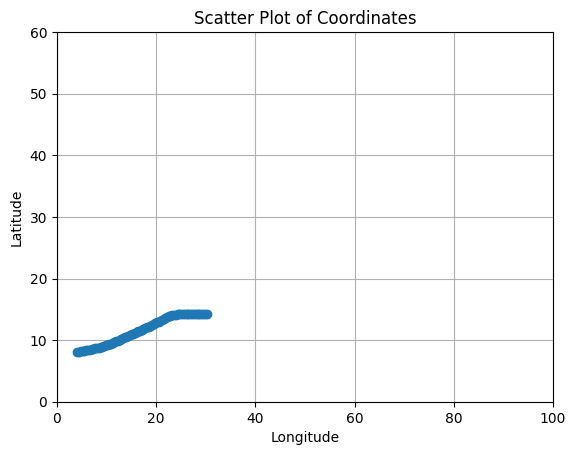

In [30]:
# 绘制点图
plt.clf()
plt.plot(pose_hybrid_world[:, 0], pose_hybrid_world[:, 1], 'o')
plt.xlim((0, 100))
plt.ylim((0, 60))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Coordinates')
plt.grid(True)
plt.show()

# bug

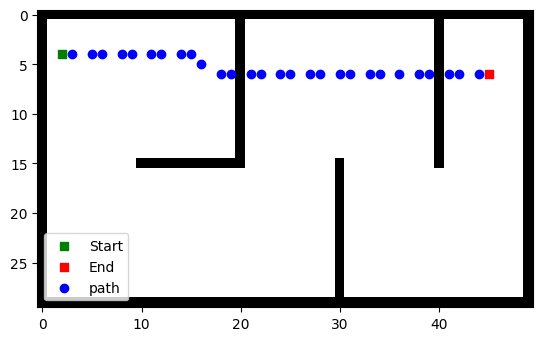

In [39]:
show_map(map0, start=start, end=end, path=a[1:-1])